<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-ciblée-sur-les-clients" data-toc-modified-id="Analyse-ciblée-sur-les-clients-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse ciblée sur les clients</a></span><ul class="toc-item"><li><span><a href="#Préparation-des-données-et-création-des-nouvelles-variables" data-toc-modified-id="Préparation-des-données-et-création-des-nouvelles-variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Préparation des données et création des nouvelles variables</a></span></li><li><span><a href="#Lien-entre-le-genre-d’un-client-et-la-catégorie-des-livres-achetés" data-toc-modified-id="Lien-entre-le-genre-d’un-client-et-la-catégorie-des-livres-achetés-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lien entre le genre d’un client et la catégorie des livres achetés</a></span><ul class="toc-item"><li><span><a href="#En-utilisant-les-transactions-comme-individus-stastistiques" data-toc-modified-id="En-utilisant-les-transactions-comme-individus-stastistiques-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>En utilisant les transactions comme individus stastistiques</a></span></li><li><span><a href="#En-utilisant-les-clients-comme-individus-statistiques" data-toc-modified-id="En-utilisant-les-clients-comme-individus-statistiques-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>En utilisant les clients comme individus statistiques</a></span></li></ul></li><li><span><a href="#Lien-entre-l'âge-des-clients-et-le-montant-total-des-achats" data-toc-modified-id="Lien-entre-l'âge-des-clients-et-le-montant-total-des-achats-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Lien entre l'âge des clients et le montant total des achats</a></span></li><li><span><a href="#Lien-entre-l'âge-et-la-fréquence-d'achat" data-toc-modified-id="Lien-entre-l'âge-et-la-fréquence-d'achat-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Lien entre l'âge et la fréquence d'achat</a></span></li><li><span><a href="#Lien-entre-l'âge-et-la-taille-du-panier-moyen" data-toc-modified-id="Lien-entre-l'âge-et-la-taille-du-panier-moyen-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Lien entre l'âge et la taille du panier moyen</a></span></li><li><span><a href="#Lien-entre-l'âge-d’un-client-et-la-catégorie-des-livres-achetés" data-toc-modified-id="Lien-entre-l'âge-d’un-client-et-la-catégorie-des-livres-achetés-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Lien entre l'âge d’un client et la catégorie des livres achetés</a></span><ul class="toc-item"><li><span><a href="#En-considérant-l'âge-comme-une-variable-quantitative" data-toc-modified-id="En-considérant-l'âge-comme-une-variable-quantitative-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>En considérant l'âge comme une variable quantitative</a></span></li><li><span><a href="#En-considérant-l'âge-comme-une-variable-qualitative-(discrétisation-en-tranches-d'âge)" data-toc-modified-id="En-considérant-l'âge-comme-une-variable-qualitative-(discrétisation-en-tranches-d'âge)-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>En considérant l'âge comme une variable qualitative (discrétisation en tranches d'âge)</a></span></li></ul></li><li><span><a href="#Conclusion-de-l'analyse-ciblée" data-toc-modified-id="Conclusion-de-l'analyse-ciblée-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion de l'analyse ciblée</a></span></li></ul></li></ul></div>

In [1]:
import os
import pandas as pd
import seaborn as sns

from P6_functions import *

In [2]:
os.listdir('../data')

['customers.csv',
 'customers_cleaned.pkl',
 'products.csv',
 'products_cleaned.pkl',
 'products_imputed.pkl',
 'pro_clients.pkl',
 'transactions.csv',
 'transactions_cleaned.pkl',
 'txns_prods_merged.pkl']

In [3]:
# on importe les datasets
customers_cleaned = pd.read_pickle('../data/customers_cleaned.pkl')
products_imputed = pd.read_pickle('../data/products_imputed.pkl')
transactions_cleaned = pd.read_pickle('../data/transactions_cleaned.pkl')
txns_prods_merged = pd.read_pickle('../data/txns_prods_merged.pkl')
pro_clients = pd.read_pickle('../data/pro_clients.pkl')

In [4]:
# on définit le thème visuel des graphiques
sns.set_theme(style='whitegrid', palette='muted')

# Analyse ciblée sur les clients

<div class="alert alert-block alert-info">
    <b>Analyses demandées</b><br>
    <ul>
        <li>Relation entre le genre d’un client et la catégorie des livres achetés</li>
        <li>Relation entre l'âge des clients et :</li>
        <ul>
            <li>le montant total des achats</li>
            <li>la fréquence d'achat</li>
            <li>la taille moyenne du panier</li>
            <li>les catégories des livres achetés</li>
        </ul>
    </ul>
</div>

## Préparation des données et création des nouvelles variables

La tranche d'âge des plus de 90 ans ne contient que 11 individus, on décide de la fusionner avec celle des 80-90 ans.

In [5]:
labels = ['-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '+80']
bins = np.linspace(10, 100, 10, dtype='int')
# on supprime 90
bins = np.delete(bins, -2)

customers_cleaned['age10'] = pd.cut(customers_cleaned['age'], bins=bins, labels=labels)
customers_cleaned.head()

,client_id,sex,birth,age,age10
0,c_4410,f,1967,55,50-60
1,c_7839,f,1975,47,40-50
2,c_1699,f,1984,38,30-40
3,c_5961,f,1962,60,50-60
4,c_5320,m,1943,79,70-80


On choisit d'éliminer les quatre clients professionnels pour réaliser l'étude ciblée. En effet, étant donné que ces clients vont acheter des livres non pas en fonction de leurs préférences, mais de ce qu'ils sont susceptibles de vendre à leurs clients, cela n'aurait pas beaucoup de sens de les inclure dans l'analyse ciblée.

In [6]:
custs_txns_prods_merged = pd.merge(
    left=customers_cleaned,
    right=txns_prods_merged,
    how='outer',
    on='client_id',
    indicator=True
)

In [7]:
custs_txns_prods_merged['_merge'].value_counts()

both          679332
left_only         21
right_only         0
Name: _merge, dtype: int64

In [8]:
# clients absents du dataset transactions
mask = custs_txns_prods_merged['_merge'] == 'left_only'
custs_not_in_txns = custs_txns_prods_merged.loc[mask, 'client_id'].unique()
custs_not_in_txns

<StringArray>
['c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443', 'c_4447', 'c_3017',
 'c_4086', 'c_6930', 'c_4358', 'c_8381', 'c_1223', 'c_6862', 'c_5245',
 'c_5223', 'c_6735',  'c_862', 'c_7584',   'c_90',  'c_587', 'c_3526']
Length: 21, dtype: string

On dénombre 23 clients qui n'auraient pas acheté de livres. Il est possible qu'ils aient acheté uniquement un ou plusieurs produits de la catégorie 1 durant la période d'octobre 2021 pour laquelle les données sont manquantes. On stocke les identifiants de ces clients dans l'array `custs_not_in_txns` et on élimine ces clients du dataset utilisé pour l'analyse ciblée.

In [9]:
# on élimine ces clients du dataset
mask = custs_txns_prods_merged['_merge'] == 'both'
custs_txns_prods_merged = custs_txns_prods_merged.loc[mask]

In [10]:
# on filtre les transactions réalisées par les clients professionnels
mask = custs_txns_prods_merged['client_id'].isin(pro_clients.index)
custs_txns_prods_merged_no_pros = custs_txns_prods_merged.loc[~mask, :]

In [11]:
# on compte le nombre de transactions éliminées
n_del_txns = custs_txns_prods_merged.shape[0] - custs_txns_prods_merged_no_pros.shape[0]
pct_del_txns = n_del_txns / custs_txns_prods_merged.shape[0] * 100

print(
    "En filtrant les transactions réalisées par des clients professionnels,",
    f"nous avons supprimé {n_del_txns} transactions ({pct_del_txns:.1f} %)."
)

En filtrant les transactions réalisées par des clients professionnels, nous avons supprimé 46643 transactions (6.9 %).


On calcule le montant total des achats et la fréquence moyenne d'achat annuelle.

In [12]:
tot_amt_and_purch_freq = custs_txns_prods_merged_no_pros.groupby('client_id').agg(
    total_amt=('price', 'sum'),
    purch_freq_per_year=('session_id', lambda x: x.count() / 2)
)
tot_amt_and_purch_freq.head(3)

,total_amt,purch_freq_per_year
client_id,,
c_1,558.18,19.5
c_10,1353.60,29.0
c_100,254.85,4.0


On calcule la taille moyenne du panier.

In [13]:
basket_size = custs_txns_prods_merged_no_pros.groupby(['client_id', 'session_id']).agg(
    basket_size=('date', 'count')
)

avg_basket_size = basket_size.groupby(['client_id']).agg(
    avg_basket_size=('basket_size', 'mean')
)

avg_basket_size.head(3)

,avg_basket_size
client_id,
c_1,1.181818
c_10,1.705882
c_100,1.600000


On calcule le montant moyen du panier (non demandé dans l'analyse).

In [14]:
basket_value = custs_txns_prods_merged_no_pros.groupby(['client_id', 'session_id']).agg(
    basket_value=('price', 'sum')
)

avg_basket_value = basket_value.groupby('client_id').agg(
    avg_basket_value=('basket_value', 'mean')
)
                                         
avg_basket_value.head(3)

,avg_basket_value
client_id,
c_1,16.914545
c_10,39.811765
c_100,50.970000


On réalise des jointures avec les dataframes créés précédemment.

In [15]:
to_merge = [tot_amt_and_purch_freq, avg_basket_size, avg_basket_value]
data_targeted = customers_cleaned.copy() \
    .set_index('client_id')

while to_merge:
    right_df = to_merge.pop(0)
    data_targeted = data_targeted.merge(right_df, left_index=True, right_index=True)
    
data_targeted.head(3)

,sex,birth,age,age10,total_amt,purch_freq_per_year,avg_basket_size,avg_basket_value
client_id,,,,,,,,
c_4410,f,1967,55,50-60,1376.82,38.0,1.461538,26.477308
c_7839,f,1975,47,40-50,554.93,18.0,1.894737,29.206842
c_1699,f,1984,38,30-40,190.60,7.5,2.500000,31.766667


On représente les relations entre les variables.

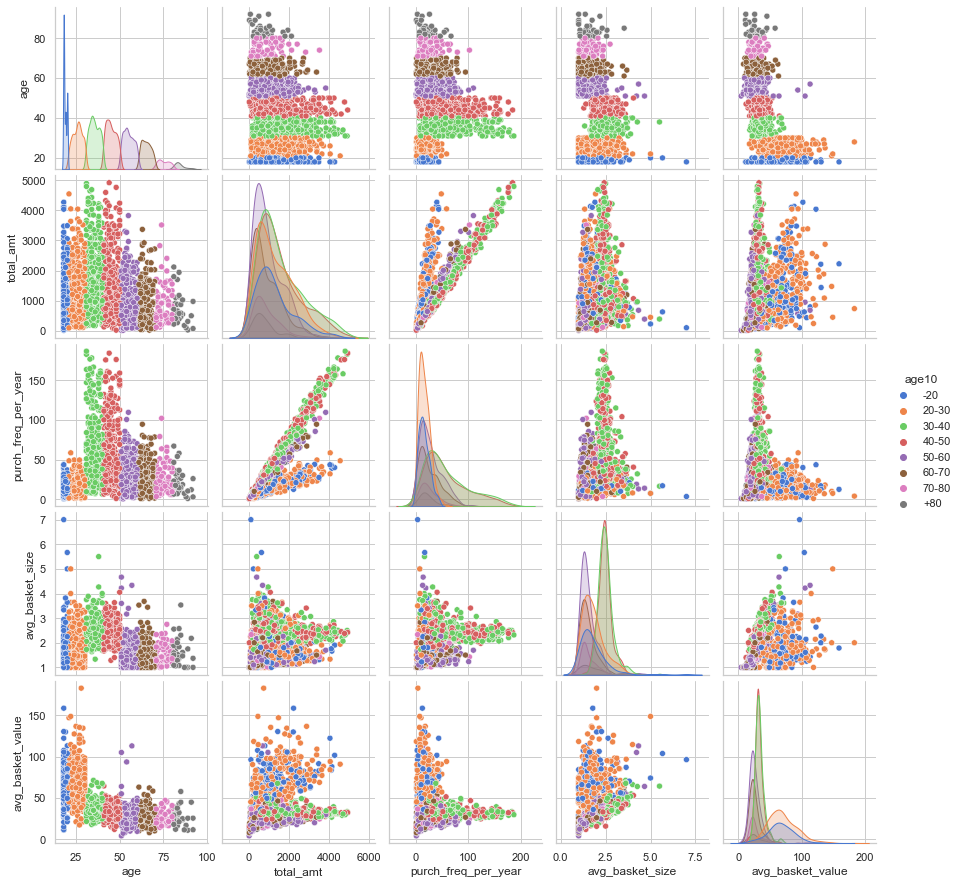

In [16]:
# pour plus de lisibilité, on ne représente qu'un échantillon des données
data_targeted_sample = data_targeted.sample(frac=0.2)

sns.pairplot(
    data_targeted_sample.drop(columns=['sex', 'birth']),
    hue='age10',
    # height=4,
    # plot_kws=dict(alpha=0.5)
)

plt.show()

Ce graphique nous permet d'avoir un aperçu des liaisons potentielles entre l'âge et les autres variables quantitatives.
Il semblerait que l'on puisse diviser les clients en trois groupes d'âges selon leur comportement : les moins de 30 ans, les 30-50 ans et les plus de 50 ans.<br>
Une description préliminaire (et subjective) de ces comportements est présentée dans le tableau ci-dessous. On cherche maintenant à vérifier si ces différences sont significatives à l'aide de tests statistiques.<br>
<br>
A noter que cette figure nous donne également une idée des liaisons qui existent entre les autres variables, même si cela n'est pas demandé dans l'analyse.<br>
Par exemple, il pourrait exister une relation linéaire entre la fréquence d'achat (`purch_freq_per_year`) et le montant total (`total_amt`) au sein des groupes mentionnés ci-dessus. Cela nous indique que le montant moyen du panier (`avg_basket_value`) est relativement constant dans ces groupes, comme on peut le voir dans le graphique de la distribution de cette variable.

In [17]:
columns = ["Moins de 30 ans", "30-50 ans", "Plus de 50 ans"]
index = [
    "Montant total",
    "Fréquence d'achat",
    "Taille moyenne du panier",
    "Montant moyen du panier"
]
data = [
    ["+++", "+++", "++"],
    ["+", "+++", "++"],
    ["++", "+++", "++"],
    ["+++", "++", "+"]
]
print("Analyse préliminaire des liaisons entre la tranche d'âge et les autres variables quantitatives\n")
display(pd.DataFrame(data=data, index=index, columns=columns))

Analyse préliminaire des liaisons entre la tranche d'âge et les autres variables quantitatives



,Moins de 30 ans,30-50 ans,Plus de 50 ans
Montant total,+++,+++,++
Fréquence d'achat,+,+++,++
Taille moyenne du panier,++,+++,++
Montant moyen du panier,+++,++,+


## Lien entre le genre d’un client et la catégorie des livres achetés

On se demande si il existe une liaison entre les deux variables qualitatives "genre du client" et "catégorie des livres achetés". Pour répondre à cette question, on réalise un test du khi² sur tableau de contingence.

### En utilisant les transactions comme individus stastistiques

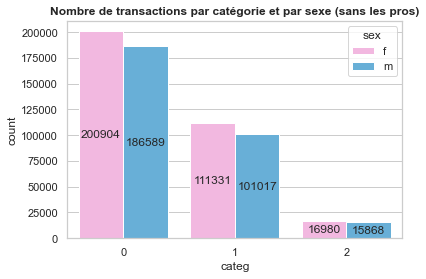

In [18]:
sns.countplot(
    data=custs_txns_prods_merged_no_pros,
    x='categ',
    hue='sex',
    palette=dict(f='#fbafe4', m='#56b4e9')
)
ax = plt.gca()
for c in ax.containers:
    ax.bar_label(c, label_type='center')
ax.set_title(
    "Nombre de transactions par catégorie et par sexe (sans les pros)",
    weight='bold'
)
plt.show()

In [19]:
dfs = [custs_txns_prods_merged, custs_txns_prods_merged_no_pros]
texts = ['Avec', 'Sans']

for i, (df, text) in enumerate(zip(dfs, texts)):
    if i: print("\n")
    title = f"{text} les clients professionnels"
    print(title)
    print("-" * len(title))
    custom_chi2(df, var1='sex', var2='categ')

Avec les clients professionnels
-------------------------------
Tableau de contingence


categ,0,1,2
sex,,,
f,206220,114899,17283
m,209460,112270,19200



Effectifs attendus


categ,0,1,2
sex,,,
f,207066,113161,18173
m,208613,114007,18309



La valeur du khi-2 est de 147.00 et la p-value de 1.2e-32. Il existerait donc une liaison entre les variables "sex" et "categ". La valeur du V de Cramer est de 0.015, indiquant que la taille de l'effet est négligeable.


Sans les clients professionnels
-------------------------------
Tableau de contingence


categ,0,1,2
sex,,,
f,200904,111331,16980
m,186589,101017,15868



Effectifs attendus


categ,0,1,2
sex,,,
f,201629,110493,17092
m,185863,101854,15755



La valeur du khi-2 est de 20.20 et la p-value de 4.1e-05. Il existerait donc une liaison entre les variables "sex" et "categ". La valeur du V de Cramer est de 0.0057, indiquant que la taille de l'effet est négligeable.


Avec ou sans les clients la professionnels, la p-value est largement inférieure à 0.05, on rejette donc l'hypothèse nulle H0. **Il existerait donc une liaison entre le sexe du client et la catégorie des livres achetés**.<br>
Cependant, d'après la valeur du V de Cramer, **la force de cette liaison est très faible**. En effet, à un degré de liberté de 1, la force de la liaison est considérée comme faible à partir de 0,1, modérée à partir de 0,3 et forte à partir de 0,5.<sup>[1]</sup><br>
A noter que le fait d'inclure ou non les clients professionnels modifie grandement les résultats du test, même si les conclusions restent inchangées.

Néanmoins, cette analyse n'est peut-être pas très rigoureuse dans le sens où **l'on ne respecte pas l'une des conditions de validité du test du khi²** qui stipule que les mesures doivent être indépendantes.<sup>[2]</sup><br>
En effet, plusieurs transactions peuvent être effectuées par un même client. Ainsi, les clients vont avoir un poids dans l'analyse proportionnel au nombre de transactions qu'ils ont effectuées. Les clients professionnels en sont une bonne illustration.<br>
Pour résoudre ce problème, on peut **normaliser le nombre d'achats pour chaque client**, c'est-à-dire travailler avec les fréquences d'achat de chaque catégorie. Chacun des clients aura alors le même poids dans l'analyse.<br>

---
Références :<br>
1. https://www.statology.org/interpret-cramers-v/
2. https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use

### En utilisant les clients comme individus statistiques

In [20]:
dfs = [custs_txns_prods_merged, custs_txns_prods_merged_no_pros]
texts = ['Avec', 'Sans']

for i, (df, text) in enumerate(zip(dfs, texts)):
    # fréquence d'achat de chaque catégorie par client
    categ_freq_by_client = pd.crosstab(
        index=df['client_id'],
        columns=df['categ'],
        normalize='index'
    ).reset_index()
    
    # somme des fréquences d'achat de chaque catégorie par sexe
    crosstab = customers_cleaned[['client_id', 'sex']] \
        .merge(categ_freq_by_client) \
        .groupby('sex').sum()
    
    if i: print("\n")
    title = f"{text} les clients professionnels"
    print(title)
    print("-" * len(title))
    custom_chi2(crosstab=np.round(crosstab, 1))

Avec les clients professionnels
-------------------------------
Tableau de contingence


,0,1,2
sex,,,
f,2234.7,1720.4,523.9
m,2065.7,1574.9,480.4



Effectifs attendus


,0,1,2
sex,,,
f,2239,1716,523
m,2060,1579,481



La valeur du khi-2 est de 0.05 et la p-value de 0.98. On ne peut donc pas rejeter l'hypothèse H0 comme quoi les variables sont indépendantes (au seuil alpha de 0.05).


Sans les clients professionnels
-------------------------------
Tableau de contingence


,0,1,2
sex,,,
f,2234.2,1720.0,523.9
m,2064.5,1573.7,479.7



Effectifs attendus


,0,1,2
sex,,,
f,2239,1715,522
m,2059,1577,480



La valeur du khi-2 est de 0.05 et la p-value de 0.97. On ne peut donc pas rejeter l'hypothèse H0 comme quoi les variables sont indépendantes (au seuil alpha de 0.05).


La p-value étant très largement supérieure à 0,05, on ne peut pas rejeter l'hypothèse H0 d'indépendance des variables. Autrement dit, **le sexe du client ne semble pas avoir d'influence sur la catégorie de livres qu'il achète**.<br>
A noter que, cette fois, la présence ou non des clients professionnels n'a que très peu d'effet sur le résultat du test.

## Lien entre l'âge des clients et le montant total des achats

On se demande si il existe une corrélation entre l'âge et le montant total des achats. On peut considérer la variable "âge" comme une variable quantitative ou comme une variable qualitative, en réalisant une discrétisation en tranches d'âges.

In [21]:
var_names = {
    'age': 'Age',
    'age10': "Tranches d'âge",
    'total_amt': 'Montant total des achats',
    'purch_freq_per_year': "Fréquence d'achat annuelle moyenne",
    'avg_basket_size': 'Taille moyenne du panier',
    'categ': 'Catégorie'
}

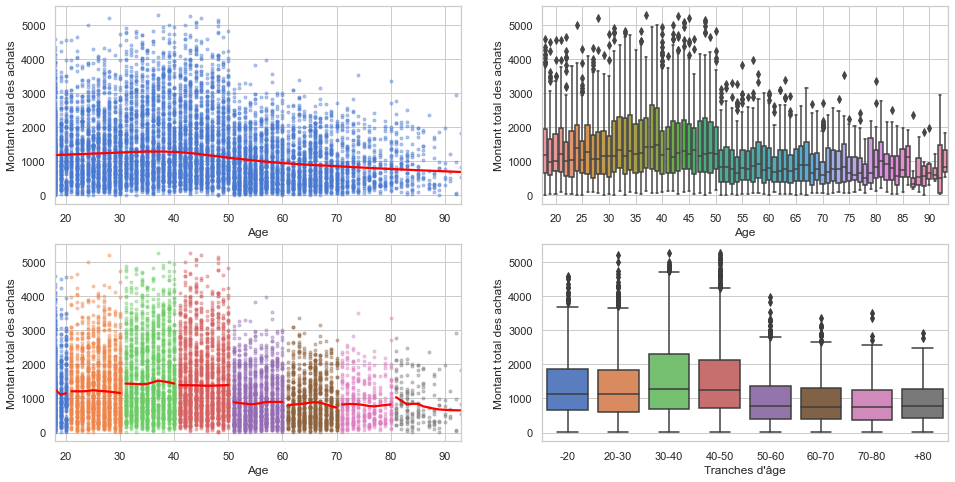

In [22]:
plot_vars(data_targeted, y_quanti='total_amt', var_names=var_names)

La relation entre l'âge et le montant total ne semble pas linéaire. Il n'est donc pas souhaitable de réaliser un test de corrélation (e.g. Pearson). En revanche, on observe des différences potentielles entre les tranches d'âge. On peut vérifier que ces différences sont significatives à l'aide par exemple d'une ANOVA.

Cette dernière est un test paramétrique et nécessite, pour que ses résultats soient fiables, de vérifier les conditions suivantes<sup>[1]</sup> :
* Indépendance des observations
* Normalité des résidus (ou de la variable quantitative pour chaque groupe<sup>[2]</sup>)
* Egalité des variances des groupes (homoscédasticité)

Si ces conditions ne sont pas satisfaites, on peut alors se rabattre l'équivalent non-paramétrique de l'ANOVA : le test de Kruskal-Wallis.<sup>[1]</sup>

---
Références :<br>
1. https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use<br>
2. https://www.theanalysisfactor.com/checking-normality-anova-model/

On commencer par vérifier l'hypothèse de normalité des résidus.

Normalité des résidus


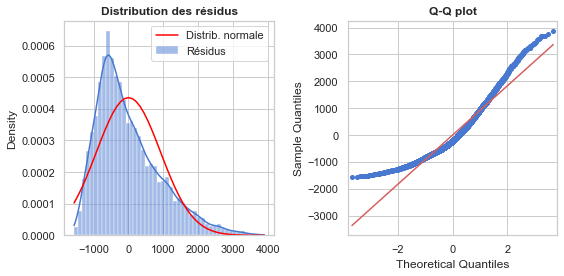


Kolmogorov-Smirnov
------------------
On obtient une statistique de 0.59 et une p-value de 0. La p-value étant inférieure au seuil alpha de 0.05, on rejette l'hypothèse H0 comme quoi les résidus sont normalement distribués.


Homoscédasticité des résidus


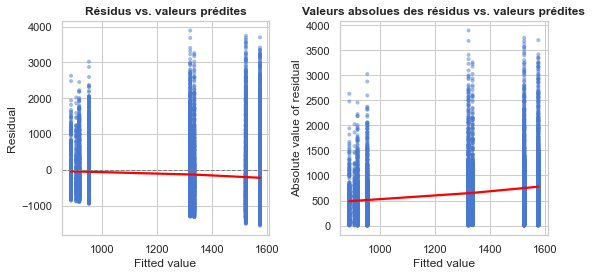

In [23]:
check_normality_and_homoscedasticity_of_residuals(
    data_targeted,
    response='total_amt',
    predictor='age10',
    ks=True
)

D'après les graphiques et le test de Kolmogorov-Smirnov, les résidus ne suivraient pas une loi normale. A noter que, lorsque l'on travaille avec des effectifs aussi importants, l'utilisation de tests conduit souvent à rejeter l'hypothèse de normalité, même si distribution ne dévit que très peu d'une distribution normale.<sup>[1]</sup> Il est donc préférable de se fier aux graphiques. De plus, en pratique, l'ANOVA est relativement robuste aux écarts aux hypothèses de validité, particulièrement lorsque l'effectif est important.<sup>[2]</sup>

L'hypothèse d'homogénéité des résidus est également rejetée. En effet, on observe une augmentation de la dispersion des résidus lorsque la valeur prédite (*fitted value*) augmente.

Il existe plusieurs manières de contourner ce problème de non-normalité. On peut essayer de transformer la variable quantitative, ou réaliser un test (non-paramétrique) de Krustal-Wallis à la place d'une ANOVA.

La distribution étant asymétrique vers la droite, nous allons tout d'abord essayer de réaliser une **transformation de Box-Cox**.

---
Sources :
1. https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless
2. https://perso.ens-lyon.fr/lise.vaudor/non-respect-des-hypotheses-du-modele-lineaire-anova-regression-cest-grave-docteur/

In [24]:
# transformation de Box Cox
data_transformed = data_targeted.copy()
data_transformed['box_cox_total_amt'] = stats.boxcox(data_transformed['total_amt'])[0]

Normalité des résidus


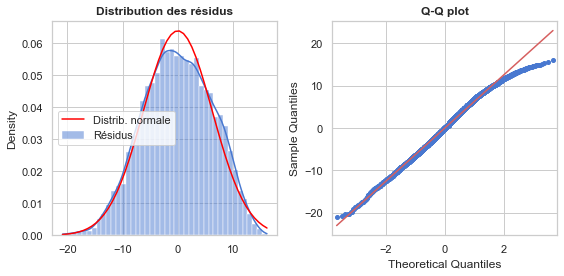


Homoscédasticité des résidus


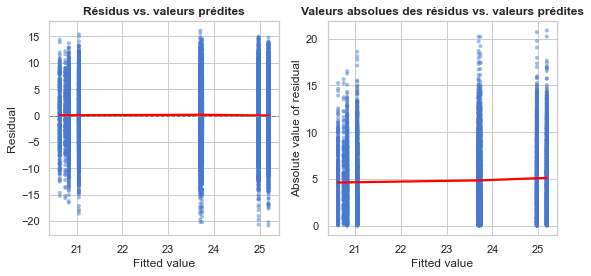

In [25]:
check_normality_and_homoscedasticity_of_residuals(
    data_transformed,
    response='box_cox_total_amt',
    predictor='age10'
)

La transformation de Box-Cox a permis de se rapprocher d'une distribution normale. Elle a également permis de rendre la variance des résidus plus homogène. On va donc réaliser une ANOVA.

In [26]:
custom_anova(data_transformed, response='box_cox_total_amt', predictor='age10')

ANOVA
-----
On obtient une statistique F de 103.2 et une p-value de 1.33e-145.
La p-value étant inférieure au seuil alpha de 0.05, on rejette l'hypothèse H0 : les moyennes sont globalement différentes.
Le R carré ajusté est de 0.077, ce qui signifie que 7.7 % de la variation est expliquée par la variable "age10".



,sum_sq,df,F,PR(>F)
age10,28190.049401,7.0,103.234885,1.325343e-145
Residual,335014.306350,8588.0,NaN,NaN


L'ANOVA nous indique que les moyennes sont globalement différentes (au moins une des moyennes est différente des autres). On cherche maintenant à savoir quelles moyennes sont différentes les unes des autres. Pour ce faire, on réalise un test post-hoc de Tukey.

Test post-hoc de Tukey HSD
--------------------------


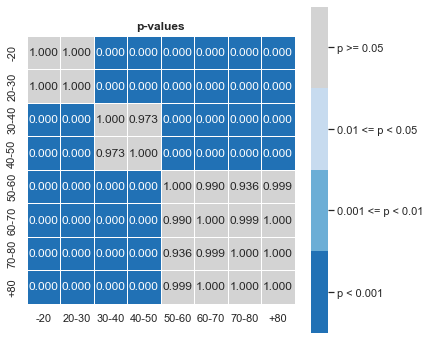

In [27]:
custom_tukey_hsd(data=data_transformed, response='box_cox_total_amt')

In [28]:
letters = ['a'] * 2 + ['b'] * 2 + ['c'] * 4

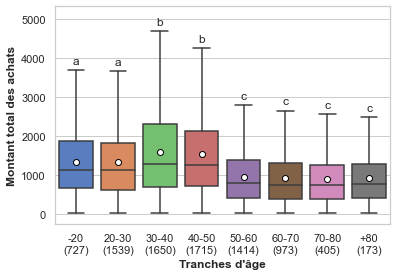

In [29]:
boxplot_letters(
    data=data_targeted,
    response='total_amt',
    predictor='age10',
    letters=letters,
    var_names=var_names
)

Trois groupes sont significativement différents : celui moins de 30 ans, celui des 30-50 ans et celui des plus de 50 ans.<br>
Autrement dit, les clients ayant entre 30 et 50 ans sont ceux qui ont dépensé le plus d'argent, suivis par les clients de moins 30 ans et ceux de plus de 50 ans.

In [30]:
columns = ["Moins de 30 ans", "30-50 ans", "Plus de 50 ans"]
index = [
    "Montant total",
    "Fréquence d'achat",
    "Taille moyenne du panier",
]
data = [
    ["++", "+++", "+"],
    [""] * 3,
    [""] * 3
]

recap = pd.DataFrame(data=data, index=index, columns=columns)
recap

,Moins de 30 ans,30-50 ans,Plus de 50 ans
Montant total,++,+++,+
Fréquence d'achat,,,
Taille moyenne du panier,,,


## Lien entre l'âge et la fréquence d'achat

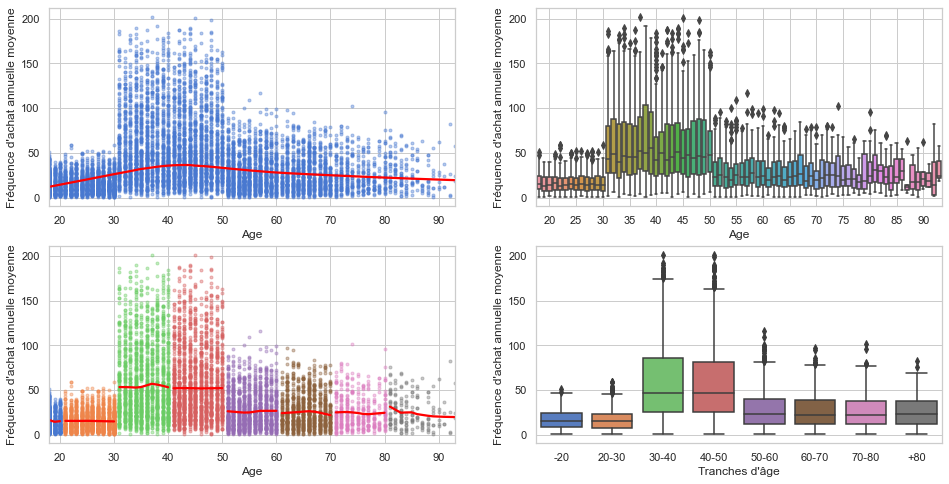

In [31]:
plot_vars(data_targeted, y_quanti='purch_freq_per_year', var_names=var_names)

La relation entre la fréquence d'achat et le montant total ne semble pas linéaire. En revanche, on observe des différences potentielles entre les tranches d'âge. On cherche à vérifier que ces différences sont significatives.

Normalité des résidus


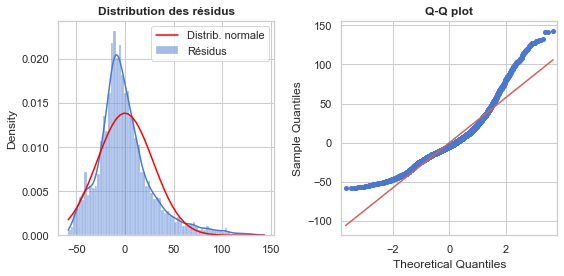

In [32]:
print("Normalité des résidus")
print("=====================")
check_normality_of_residuals(
    data_targeted,
    response='purch_freq_per_year',
    predictor='age10'
)

In [33]:
# transformation de Box Cox
data_transformed['box_cox_purch_freq'] = stats.boxcox(data_transformed['purch_freq_per_year'])[0]

Normalité des résidus


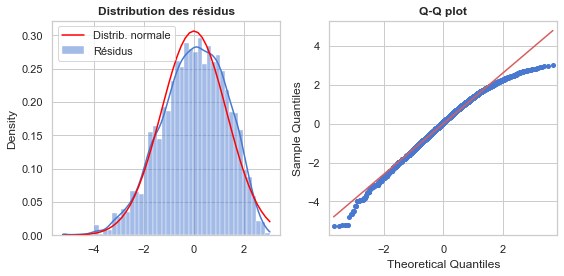


Homoscédasticité des résidus


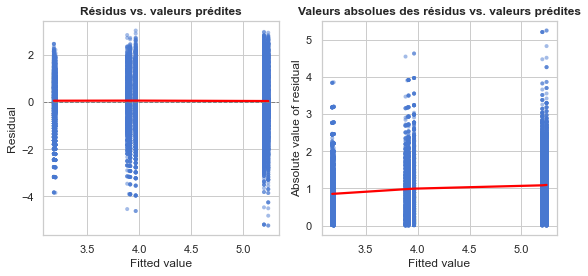

In [34]:
check_normality_and_homoscedasticity_of_residuals(
    data_transformed,
    response='box_cox_purch_freq',
    predictor='age10'
)

In [35]:
custom_anova(data_transformed, response='box_cox_purch_freq', predictor='age10')

ANOVA
-----
On obtient une statistique F de 508.8 et une p-value de 0.
La p-value étant inférieure au seuil alpha de 0.05, on rejette l'hypothèse H0 : les moyennes sont globalement différentes.
Le R carré ajusté est de 0.293, ce qui signifie que 29.3 % de la variation est expliquée par la variable "age10".



,sum_sq,df,F,PR(>F)
age10,6045.374108,7.0,508.846982,0.0
Residual,14575.718577,8588.0,NaN,NaN


On compare les moyennes des groupes deux à deux avec un test de Tukey.

Test post-hoc de Tukey HSD
--------------------------


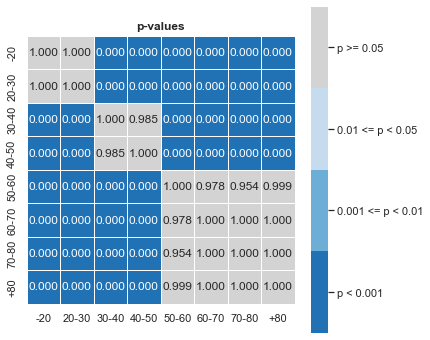

In [36]:
custom_tukey_hsd(data=data_transformed, response='box_cox_purch_freq')

In [37]:
letters = ['a'] * 2 + ['b'] * 2 + ['c'] * 4

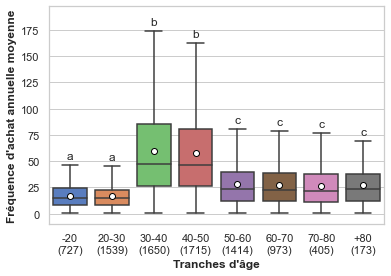

In [38]:
boxplot_letters(
    data=data_targeted,
    response='purch_freq_per_year',
    predictor='age10',
    letters=letters,
    var_names=var_names
)

Les clients entre 30 et 50 ans sont ceux qui effectuent le plus fréquemment des achats, suivis par les clients de plus 50 ans et par ceux de moins de 30 ans.

In [39]:
recap.iloc[1] = ["+", "+++", "++"]
recap

,Moins de 30 ans,30-50 ans,Plus de 50 ans
Montant total,++,+++,+
Fréquence d'achat,+,+++,++
Taille moyenne du panier,,,


## Lien entre l'âge et la taille du panier moyen

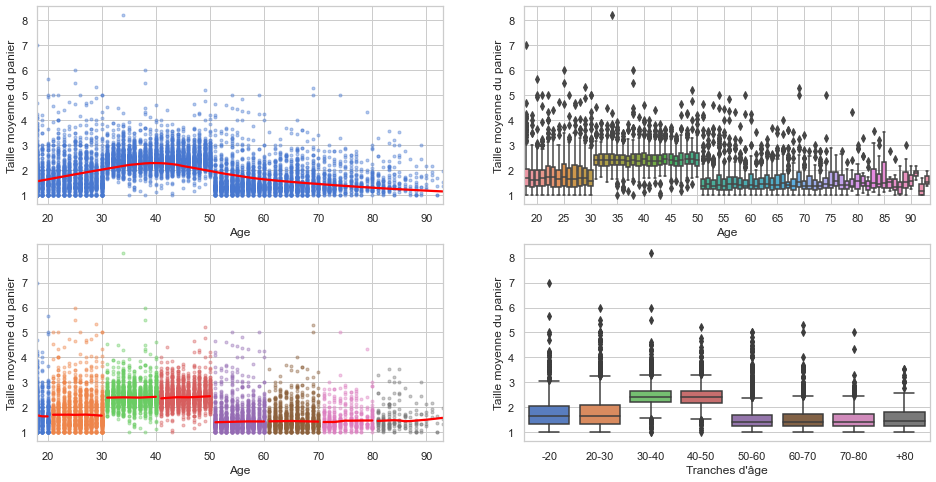

In [40]:
plot_vars(data_targeted, y_quanti='avg_basket_size', var_names=var_names)

Tout comme pour les variables précédentes, la relation entre l'âge et la taille moyenne du panier ne semble pas linéaire. En revanche, on observe des différences potentielles entre les tranches d'âge. On cherche à vérifier que ces différences sont significatives.

Normalité des résidus


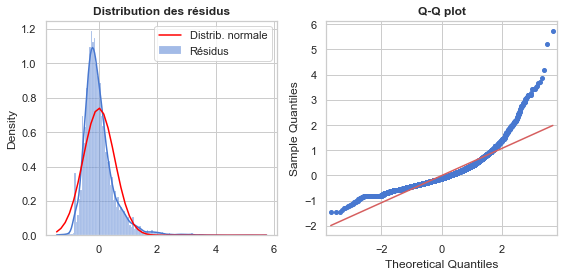

In [41]:
print("Normalité des résidus")
print("=====================")
check_normality_of_residuals(
    data_targeted,
    response='avg_basket_size',
    predictor='age10'
)

In [42]:
# transformation de Box Cox
data_transformed['box_cox_avg_basket_size'] = stats.boxcox(data_transformed['avg_basket_size'])[0]

Normalité des résidus


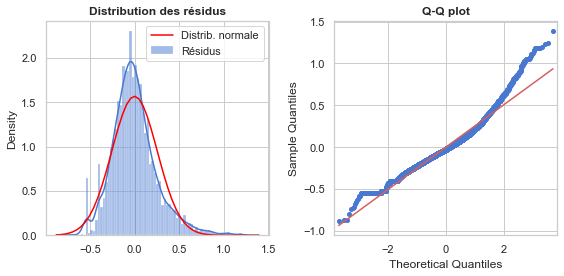


Homoscédasticité des résidus


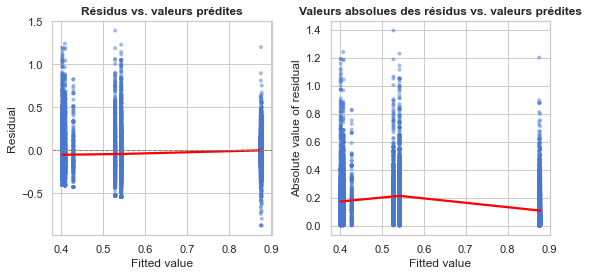

In [43]:
check_normality_and_homoscedasticity_of_residuals(
    data_transformed,
    response='box_cox_avg_basket_size',
    predictor='age10'
)

La transformation de Box-Cox n'a pas sensiblement amélioré la distribution des résidus ou leur homogénéité. On va réaliser un test non-paramétrique de Kruskal-Wallis à la place d'une ANOVA.

In [44]:
custom_kruskal(
    data=data_targeted,
    response='avg_basket_size',
    predictor='age10'
)

Kruskal-Wallis
--------------
On obtient une statistique H de 3721.8 et une p-value de 0.
La p-value étant inférieure au seuil alpha de 0.05, on rejette l'hypothèse H0 comme quoi les médianes sont égales. Au moins une des médianes est différente des autres.
La valeur de l'epsilon carré (équivalent de l'êta carré dans une ANOVA) est de 0.433, indiquant que la taille de l'effet est grande.


Test post-hoc de Dunn
---------------------


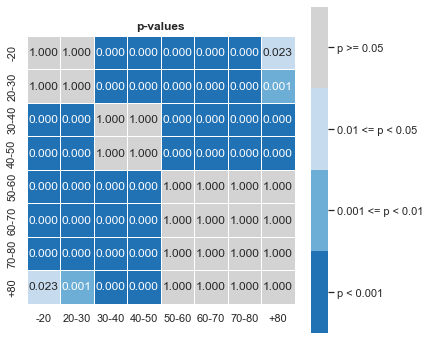

In [45]:
custom_dunn(data=data_transformed, response='avg_basket_size')

In [46]:
letters = ['a'] * 2 + ['b'] * 2 + ['c'] * 4

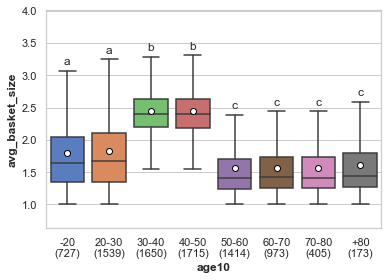

In [47]:
boxplot_letters(
    data_targeted,
    response='avg_basket_size',
    predictor='age10',
    letters=letters
)

In [48]:
recap.iloc[2] = ["++", "+++", "+"]
recap

,Moins de 30 ans,30-50 ans,Plus de 50 ans
Montant total,++,+++,+
Fréquence d'achat,+,+++,++
Taille moyenne du panier,++,+++,+


## Lien entre l'âge d’un client et la catégorie des livres achetés

### En considérant l'âge comme une variable quantitative

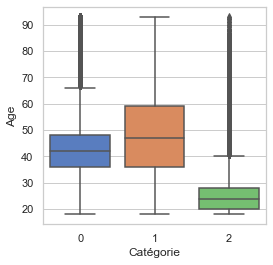

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
    
sns.boxplot(data=custs_txns_prods_merged_no_pros, x='categ', y='age', ax=ax)
ax.set_xlabel('Catégorie')
ax.set_ylabel('Age')

plt.show()

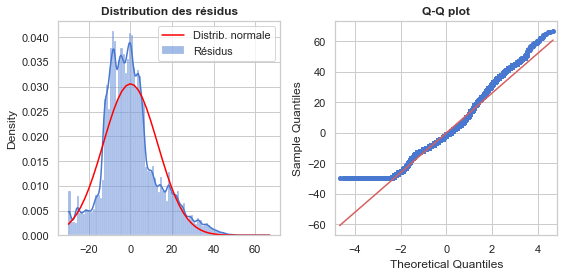

In [50]:
check_normality_of_residuals(
    custs_txns_prods_merged_no_pros,
    response='age',
    predictor='categ',
    hist_kws=dict(binwidth=1)
)

La distribution semble assez différente d'une distribution normale, on va réaliser un test de Krukal-Wallis.

In [51]:
custom_kruskal(
    custs_txns_prods_merged_no_pros,
    response='age',
    predictor='categ'
)

Kruskal-Wallis
--------------
On obtient une statistique H de 72214.8 et une p-value de 0.
La p-value étant inférieure au seuil alpha de 0.05, on rejette l'hypothèse H0 comme quoi les médianes sont égales. Au moins une des médianes est différente des autres.
La valeur de l'epsilon carré (équivalent de l'êta carré dans une ANOVA) est de 0.114, indiquant que la taille de l'effet est moyenne.


Test post-hoc de Dunn
---------------------


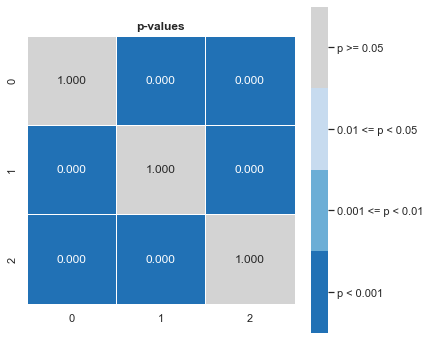

In [52]:
custom_dunn(
    custs_txns_prods_merged_no_pros,
    response='age',
    predictor='categ'
)

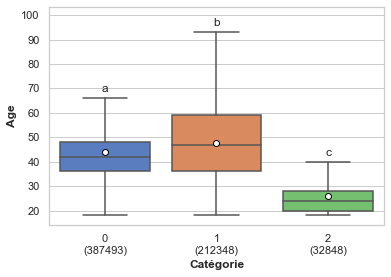

In [53]:
letters = ['a', 'b', 'c']

boxplot_letters(
    custs_txns_prods_merged_no_pros,
    response='age',
    predictor='categ',
    letters=letters,
    var_names=var_names
)

L'âge médian des clients est significativement différent entre les trois catégories. **Les clients de la catégorie 2 sont généralement plus jeunes avec un âge médian de 24 ans, suivis par la catégorie 0 avec un âge médian de 42 ans et de la catégorie 1 avec un âge médian de 47 ans.**

### En considérant l'âge comme une variable qualitative (discrétisation en tranches d'âge)

On réalise un test du khi-2 sur tableau de contingence.

Tableau de contingence


categ,0,1,2
age10,,,
-20,5346,9120,9641
20-30,11351,18967,20238
30-40,149439,46013,748
40-50,149985,46798,727
50-60,34745,44831,711
60-70,23164,29443,494
70-80,9462,11961,196
+80,4001,5215,93



Effectifs attendus


categ,0,1,2
age10,,,
-20,14764,8090,1251
20-30,30963,16967,2624
30-40,120163,65850,10186
40-50,120965,66289,10254
50-60,49172,26946,4168
60-70,32521,17822,2756
70-80,13240,7255,1122
+80,5701,3124,483



La valeur du khi-2 est de 274834.30 et la p-value de 0. Il existerait donc une liaison entre les variables "age10" et "categ". La valeur du V de Cramer est de 0.47, indiquant que la taille de l'effet est grande.


Contributions au Khi-2


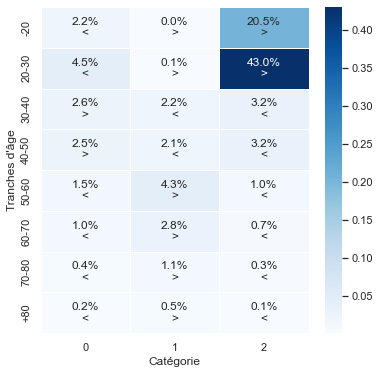

In [54]:
custom_chi2(
    custs_txns_prods_merged_no_pros,
    var1='age10',
    var2='categ',
    var_names=var_names,
    plot_contributions=True
)

Les effectifs des achats de livres de la catégorie 2 par les clients des tranches d'âge 20-30 ans et 30-40 ans sont beaucoup plus importants que ce à quoi on s'attendrait si les variables étaient indépendantes. Ils contribuent à eux seuls à près de 21 % et 43 % de la valeur du khi-2, respectivement.

## Conclusion de l'analyse ciblée

* Nous n'avons pas trouvé de liaison significative entre le sexe du client et la catégorie de livres achetés.
* Il existe en revanche une liaison entre l'âge du client et la catégorie. On a observé notamment que la catégorie 2 est particulièrement populaire chez les clients de moins de 30 ans.
* Nous avons pu regrouper les clients en trois groupes d'âges (moins de 30 ans, 30-50 ans et plus de 50 ans) selon leur comportement de consommation. Les résultats obtenus sont synthétisés dans le tableau ci-dessous.

In [55]:
recap

,Moins de 30 ans,30-50 ans,Plus de 50 ans
Montant total,++,+++,+
Fréquence d'achat,+,+++,++
Taille moyenne du panier,++,+++,+
